<a href="https://colab.research.google.com/github/parul5sahoo/TSF_GRIPAUG21_Tasks/blob/master/TSF_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GRIPAUG21 Data Science and Business Analytics**
# **TASK 1: Prediction using Supervised ML**
Author: Parul Sahoo

Dataset used in this task: http://bit.ly/w-data

Objective: To predict the percentage of a student on the basis of no. of study hours.

**Importing the neccessary libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Reading the data**

In [6]:
std_score = pd.read_csv("http://bit.ly/w-data")
std_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Undesrtanding the data**


In [15]:
# basic summary of data

std_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#statistical description

std_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
# Shape of the data 
std_score.shape

(25, 2)

In [14]:
# finding for null values

std_score.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Data Visualization**

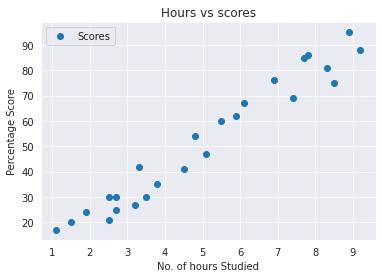

In [18]:
# plotting of the no. of study hours vs scores of the student

s_score.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs scores')
plt.xlabel('No. of hours Studied')
plt.ylabel('Percentage Score')

plt.show()

In [19]:
# finding correaltion between attributes

std_score.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Prerequisite Data**

In [20]:
#Splitting the dataset into independent and dependent variaable

X = std_score.iloc[:,:-1]
y = std_score.iloc[:,-1]

In [21]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

**Preparing the Algorithm**

In [23]:
# Training the linear regression model first

regres = LinearRegression()
regres.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Training the algorithm

algo=LinearRegression()
algo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the result**


In [26]:
# Predict the scores based on test data

y_pred = regres.predict(X_test)

**Visualizing the training set results**


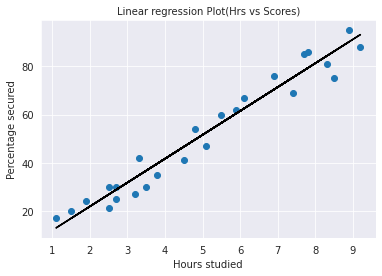

In [35]:
# Plotting the regression line for training set

line = regres.coef_*X + regres.intercept_

plt.title('Linear regression Plot(Hrs vs Scores)', size=10)
plt.ylabel('Percentage secured', size=10)
plt.xlabel('Hours studied', size=10)
plt.scatter(X,y)
plt.plot(X, line, color ='black')

plt.show()

**Visualizing the test set resutls**


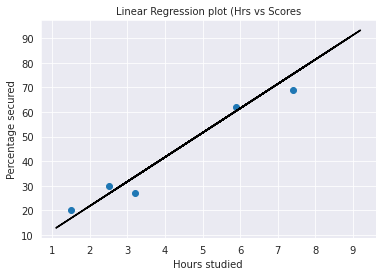

In [37]:
# Plotting the regression line for test set

plt.scatter(X_test, y_test)
plt.plot(X_train, regres.predict(X_train), color = 'black')
plt.title('Linear Regression plot (Hrs vs Scores', size=10)
plt.xlabel('Hours studied')
plt.ylabel('Percentage secured')

plt.show()

 **Compairing the results**

In [43]:
# Comparing Actual vs Predicted

pred=algo.predict(X_test)
pd.DataFrame({'ACTUAL_VALUE':y_test,'PREDICTED_VALUE':pred})

,ACTUAL_VALUE,PREDICTED_VALUE
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [44]:
#Predicting the result for given value

prediction=regres.predict([[9.5]])
prediction

array([96.16939661])

**Finding the score for given study hours**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


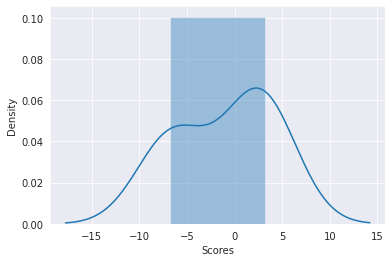

In [46]:
# plotting 

sb.distplot(y_test-pred)

In [47]:
h=9.25
a=algo.predict([[h]])
print('if a student studies for {} hours per day then predicted score {}%'.format(h,*a))

if a student studies for 9.25 hours per day then predicted score 93.69173248737539%


**Model Scoring**

In [50]:
# chechking for Mean Absolute Error & RMSE

from sklearn import metrics

print('Mean Absolute Error:',
       metrics.mean_absolute_error(y_test, y_pred))

print('RMSE Score:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 4.183859899002982
RMSE Score: 4.647447612100373


In [49]:
#Calculating for the accuracy of model

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105354

We come to a conlusion that this model is capable of predicting score with Mean Absolute Error 4.18 & RMSE 4.64.

Since we have the R-Squared value of 0.945, we can say that the accuracy of our model is appreciable.